# Notebook for the Audit operations

# Loading the modules and libraries using snippets
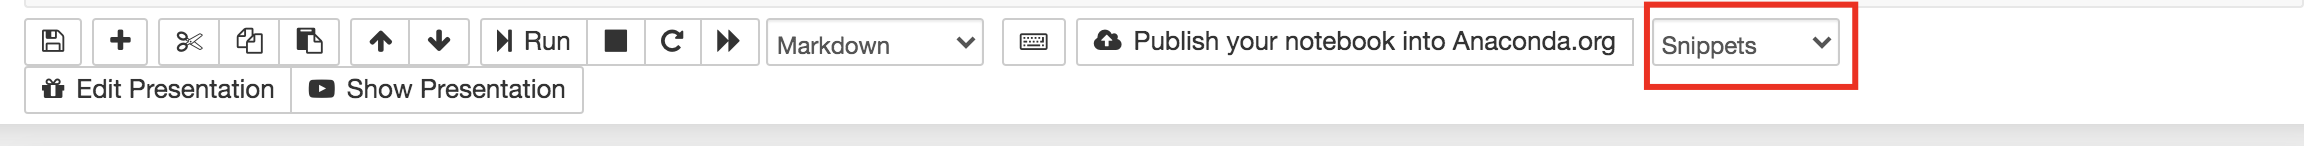


In [1]:
import numpy as np
import matplotlib as mpl
import audit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


/Users/alexanderarakelov/anaconda/lib/python3.5/site-packages/scipy/__init__.py:144: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.13.1)
  UserWarning)


# Loading the data

In [2]:
#Input the name of the file which suppose to be located in the working directory.
data = pd.read_csv('Generated_Dirty_JournalSet.csv')

## General information about the Audit module and commands

### Example of data set with following columns:
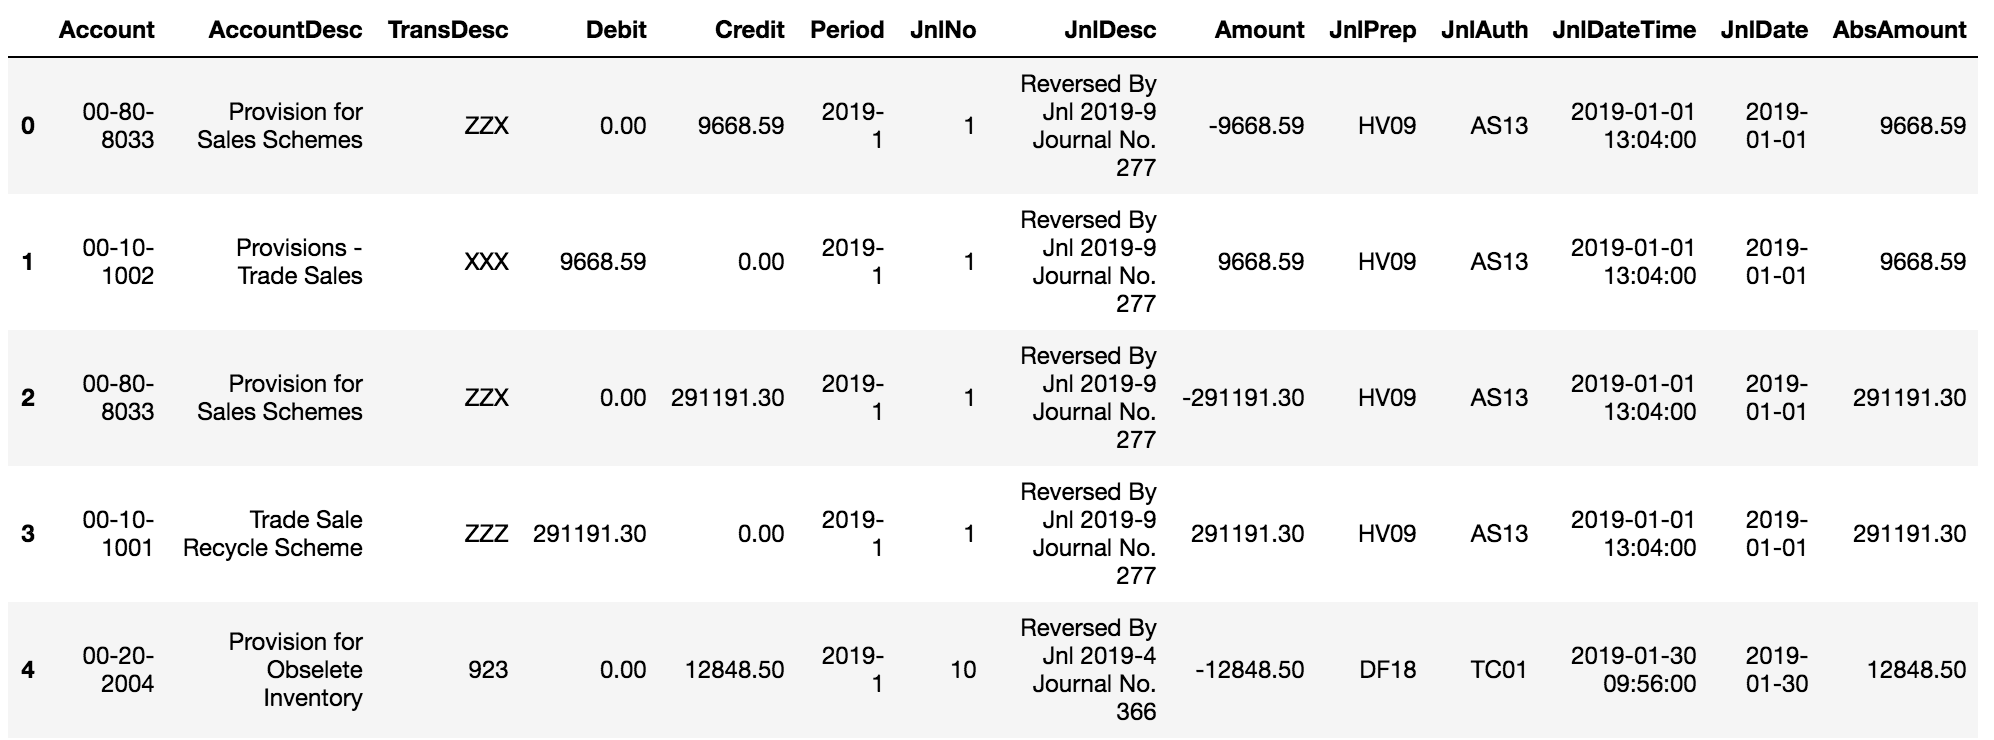


<b>Module can be used by typing:</b> <i>audit.[function_name](name of the data file)</i>
 

<b>It has following functions:</b>

<b>Manipulative:</b>
<li>change_column_names(df)</li>

<b>General information:</b>
<li>missing_values_table(df)</li>
<li>maxamount_by_period(df)</li>
<li>transactions_by_period(df)</li>
<li>total_amount_for_periods(df)</li>
<li>information(df)</li>

<b>Specific tests:</b>

<li>summary_by_two_variables(df)     - This is a general function which can be used for any data set.</li>
<li>summary_by_one_variable(df)     - This is a general function which can be used for any data set.</li>
<li>GroupByVariable_amount_over_150000     - This is a general function which can be used for any data set.</li>
<li>summary_by_account_and_description(df)</li>
<li>summary_by_accountnumber(df)</li>
<li>summary_by_period(df)</li>
<li>summary_by_account_and_period(df)</li>
<li>summary_by_specific_account_and_period(df)</li>
<li>summary_by_specific_period(df)</li>
<li>summary_by_journal(df)</li>
<li>summary_by_journal_type(df)</li>
<li>summary_by_user(df)</li>
<li>summary_by_authoriser(df)</li>
<li>summary_by_authoriser_user(df)</li>
<li>unbalanced_journals(df)</li>    
<li>transactions_posted_before_6AM(df)</li>    
<li>transactions_posted_after_6PM(df)</li>
<li>transactions_over_150000(df)</li>    
<li>JnlPrep_amount_over_150000(df)</li>    
<li>JnlAuth_amount_over_150000(df)</li> 
<li>transactions_over_value</li> 
<li>transactions_authoriser_user_equal(df)</li>
<li>Items_no_description(df)</li>  
<ol>
    
<b>To make that module more flexible it takes actual column names. Remember that it is letter-sensitive.</b>
<b>I hope that function purpose is represented by the name of it by making it more user-friendly </b>


<b>All the functions are stored in audit.py file which suppose to be located in working diredctory!</b>
<b>Changes regarding the functions can be made straight in the audit.py file.</b>


https://github.com/alexed26/audit_project

# Preprocessing the data to get general picture about the data

In [3]:
# When Date and Time is combined it is required to separate them with creating additional columns day and time.
data[['day','time']] = data.JnlDateTime.astype(str).str.split(" ",expand=True,)
# Absolute the amount value using the abs command in the numpy package
data['AbsAmount'] = np.abs(data['Amount']) 
# All the identification columns have to be string type
data['JnlNo'] = data['JnlNo'].astype(str)

In [4]:
data.head()

,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
0,00-80-8033,Provision for Sales Schemes,ZZX,0.000000,9668.591557,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,-9668.591557,HV09,AS13,2019-01-01 13:04,2019-01-01,13:04,9668.591557
1,00-10-1002,Provisions - Trade Sales,XXX,9668.591557,0.000000,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,9668.591557,HV09,AS13,2019-01-01 13:04,2019-01-01,13:04,9668.591557
2,00-80-8033,Provision for Sales Schemes,ZZX,0.000000,291191.298080,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,-291191.298080,HV09,AS13,2019-01-01 13:04,2019-01-01,13:04,291191.298080
3,00-10-1001,Trade Sale Recycle Scheme,ZZZ,291191.298080,0.000000,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,291191.298080,HV09,AS13,2019-01-01 13:04,2019-01-01,13:04,291191.298080
4,00-20-2004,Provision for Obselete Inventory,923,0.000000,12848.502053,2019-1,10,Reversed By Jnl 2019-4 Journal No. 366,-12848.502053,DF18,TC01,2019-01-30 09:56,2019-01-30,09:56,12848.502053


# Getting general information

In [5]:
audit.information(data)

Your selected data has 15 columns.
They are: 
Account
AccountDesc
TransDesc
Debit
Credit
Period
JnlNo
JnlDesc
Amount
JnlPrep
JnlAuth
JnlDateTime
day
time
AbsAmount


Select the name of Account identificator column
Account
Select the name of Transaction descriptions identificator column
TransDesc
Select the name of Period column
Period
Select the name of JnlPrep  identificator column
JnlPrep
Select the name of JnlAuth identificator column
JnlAuth
Select the name of the time column
time
Select the Debit column
Debit
Your selected data has 48 unique Accounts.
Your selected data has 84 unique Transaction descriptions.
Your selected data has 12 Periods.
Your selected data has 10 unique JnlPrep values.
Your selected data has 6 unique JnlAuth values.


Here is the information available for certain data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 15 columns):
Account        3999 non-null object
AccountDesc    3991 non-null object
TransDes

,Debit,Credit,Amount,AbsAmount
count,4001.00,4001.00,4001.00,4001.00
mean,31747.81,31746.32,1.49,63494.14
std,115849.88,115850.27,169878.60,157563.40
min,0.00,0.00,-1065322.15,0.07
25%,0.00,0.00,-4163.37,152.89
50%,0.80,0.00,0.80,4163.69
75%,4163.69,4163.37,4163.69,26337.11
max,1065322.15,1065322.15,1065322.15,1065322.15


In [6]:
audit.missing_values_table(data)

Your selected dataframe has 15 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
JnlDesc,3285,82.1
AccountDesc,10,0.2
JnlDateTime,7,0.2
time,7,0.2
Account,2,0.0


In [8]:
audit.transactions_by_period(data)

Select the column which contains the period:
Period
Below is the total amount of transactions for the following period 2019-1:
215
Below is the total amount of transactions for the following period 2019-3:
445
Below is the total amount of transactions for the following period 2019-4:
473
Below is the total amount of transactions for the following period 2019-5:
156
Below is the total amount of transactions for the following period 2019-6:
225
Below is the total amount of transactions for the following period 2019-7:
284
Below is the total amount of transactions for the following period 2019-2:
286
Below is the total amount of transactions for the following period 2019-8:
258
Below is the total amount of transactions for the following period 2019-9:
390
Below is the total amount of transactions for the following period 2019-10:
403
Below is the total amount of transactions for the following period 2019-11:
451
Below is the total amount of transactions for the following period 2019-12:
4

In [9]:
audit.maxamount_by_period(data)

Select the name of the amount column:
Amount
Select the column which contains the period:
Period
Max transaction for each period:

--------------------------------------2019-1-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
1166,00-80-8043,Tax Control,XXX,876804.533599,0.0,2019-1,25,NaN,876804.533599,DF18,AS13,2019-01-31 16:23,2019-01-31,16:23,876804.533599



--------------------------------------2019-3-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
3866,00-80-8043,Tax Control,XXX,894362.913907,0.0,2019-3,89,NaN,894362.913907,DF18,SP18,2019-03-29 14:29,2019-03-29,14:29,894362.913907



--------------------------------------2019-4-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
723,00-80-8043,Tax Control,XXX,887906.967,0.0,2019-4,183,NaN,887906.967,AC04,TC01,2019-04-30 19:37,2019-04-30,19:37,887906.967



--------------------------------------2019-5-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
820,00-80-8035,Forex Holding Account,1206,997226.634752,0.0,2019-5,199,Reverses Jnl 2019-12 Journal No. 108,997226.634752,AM04,CH20,2019-05-31 14:49,2019-05-31,14:49,997226.634752
825,00-80-8034,Forex Pending,XXXX,997226.634752,0.0,2019-5,199,Reversed By Jnl 2019-12 Journal No. 108,997226.634752,AM04,CH20,2019-05-31 14:49,2019-05-31,14:49,997226.634752



--------------------------------------2019-6-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
1148,00-80-8035,Forex Holding Account,1206,931222.479636,0.0,2019-6,247,Reverses Jnl 2019-5 Journal No. 481,931222.479636,DF18,CH20,2019-06-30 07:28,2019-06-30,07:28,931222.479636



--------------------------------------2019-7-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
1257,00-80-8043,Tax Control,XXX,887749.653417,0.0,2019-7,263,NaN,887749.653417,CH20,AS13,2019-07-29 17:50,2019-07-29,17:50,887749.653417



--------------------------------------2019-2-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
3604,00-80-8043,Tax Control,XXX,886763.93608,0.0,2019-2,61,NaN,886763.93608,AC04,CH20,2019-02-28 15:29,2019-02-28,15:29,886763.93608



--------------------------------------2019-8-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
1481,00-80-8035,Forex Holding Account,1206,1.065322e+06,0.0,2019-8,293,Reverses Jnl 2019-2 Journal No. 133,1.065322e+06,JC39,AM04,2019-08-01 17:21,2019-08-01,17:21,1.065322e+06



--------------------------------------2019-9-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
2167,00-80-8044,Tax Input,XZZX,888602.652994,0.0,2019-9,388,NaN,888602.652994,DF18,CH20,2019-09-30 12:47,2019-09-30,12:47,888602.652994



--------------------------------------2019-10-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
2522,00-80-8044,Tax Input,XZZX,888587.212971,0.0,2019-10,433,NaN,888587.212971,GL06,TC01,2019-10-31 13:12,2019-10-31,13:12,888587.212971



--------------------------------------2019-11-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
3027,00-80-8043,Tax Control,XXX,892963.652264,0.0,2019-11,484,NaN,892963.652264,AM04,SP18,2019-11-28 12:06,2019-11-28,12:06,892963.652264



--------------------------------------2019-12-------------------------------------



,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
3317,00-80-8034,Forex Pending,XXXX,931222.479636,0.0,2019-12,515,Reversed By Jnl 2019-6 Journal No. 481,931222.479636,DF18,CH20,2019-12-30 07:28,2019-12-30,07:28,931222.479636


In [10]:
audit.total_amount_for_periods(data)

Select the name of the Amount column:
Amount
Select the column which contains the period:
Period
Below is the total amount for the following period 2019-1:
6.97
Below is the total amount for the following period 2019-3:
5608.4
Below is the total amount for the following period 2019-4:
0.0
Below is the total amount for the following period 2019-5:
0.0
Below is the total amount for the following period 2019-6:
-0.0
Below is the total amount for the following period 2019-7:
0.0
Below is the total amount for the following period 2019-2:
208.76
Below is the total amount for the following period 2019-8:
-0.0
Below is the total amount for the following period 2019-9:
-0.0
Below is the total amount for the following period 2019-10:
10.04
Below is the total amount for the following period 2019-11:
131.01
Below is the total amount for the following period 2019-12:
-0.0


<b>In order to change colums following function can be applied</b>

In [8]:
audit.change_column_names(data)

Your selected data has 15 columns.
They are: 
gg
AccountDesc
TransDesc
Debit
Credit
Period
JnlNo
JnlDesc
Amount
JnlPrep
JnlAuth
JnlDateTime
day
time
AbsAmount


Which column do you want to change?
gg
What name it should have?
Account


['Account', 'AccountDesc', 'TransDesc', 'Debit', 'Credit', 'Period', 'JnlNo', 'JnlDesc', 'Amount', 'JnlPrep', 'JnlAuth', 'JnlDateTime', 'day', 'time', 'AbsAmount']


For other changes repeat the function


## In order to combine two reports with the same structure following code can be used

In [ ]:
# Uploading two of the xlsx files into Python environment
data1 = pd.read_excel('excel_work\sample_data\Book_1.xlsx') 
data2 = pd.read_excel('excel_work\sample_data\Book_2.xlsx') 
  
# concat both DataFrame into a single DataFrame 
data3 = pd.concat([data1, data2]) 
  
# Export Dataframe into Excel file 
data3.to_excel('Combined_output.xlsx', index=False) 

# Visualisation

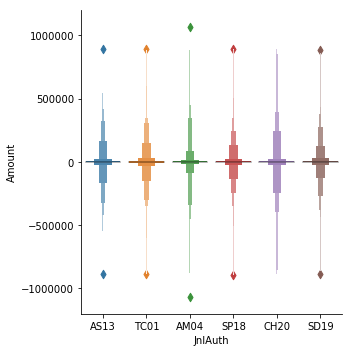

In [11]:
# In this type of plot x and y axis represents the column names visualised by Violin plots
sns.catplot(x='JnlAuth', y='Amount', kind='boxen', data=data)

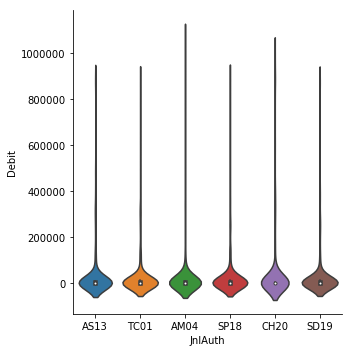

In [12]:
# In this type of plot x and y axis represents the column names visualised by Violin plots
sns.catplot(x='JnlAuth', y='Debit', kind='violin', data=data)

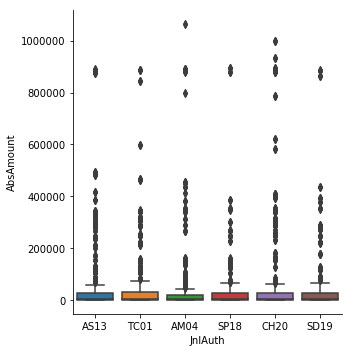

In [13]:
# In this type of plot x and y axis represents the column names visualised by Violin plots
sns.catplot(x='JnlAuth', y='AbsAmount', kind='box', data=data)

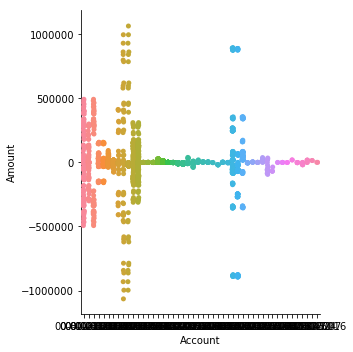

In [14]:
# In this type of plot x and y axis represents the column names visualised by Violin plots
sns.catplot(x='Account', y='Amount', kind='strip', data=data)

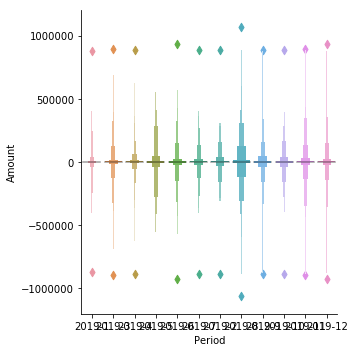

In [15]:
sns.catplot(x='Period', y='Amount', kind='boxen', data=data)

# Specific tests

## Summary by Account

<b>Summary by Account (with name)</b>
<ol>
<li>The data has an account number (Account) and a name for the account (AccountDesc in this case). The test is a basic summarisation over account, so for each account you get the total debits, the total credits and the total amount.</il>
</ol>


In [10]:
audit.summary_by_two_variables(data)

Select the name of the first column for grouping:
Account
Select the name of the second column for grouping
AccountDesc
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,,Debit,Credit,Amount,AbsAmount
Account,AccountDesc,,,,
00-10-1001,Trade Sale Recycle Scheme,11600033.30,11633454.43,-33421.14,23233487.73
00-10-1002,Provisions - Trade Sales,3916917.01,3983148.95,-66231.94,7900065.96
00-20-2003,CoS-Inventory,151409.66,58846.99,92562.67,210256.66
00-20-2004,Provision for Obselete Inventory,2112216.09,1347966.75,764249.34,3460182.83
00-20-2005,Freight In Purchases,25441.36,0.00,25441.36,25441.36
00-20-2006,Supplier Rebate,39072.49,0.00,39072.49,39072.49
00-20-2007,Supplier Refunds,30322.05,0.00,30322.05,30322.05
00-20-2008,Inventory-Misc. Costs,120900.07,0.00,120900.07,120900.07
00-20-2009,Inventory-Misc. Costs,43355.93,305592.34,-262236.40,348948.27


In [11]:
audit.summary_by_one_variable(data)

Select the column name for grouping
AccountDesc
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
AccountDesc,,,,
Accruals,6753174.96,6199040.95,554134.01,12952215.91
Additional Shipping Costs,38307.18,0.00,38307.18,38307.18
Bank Fees,505.73,0.00,505.73,505.73
Cash Account,4932.12,0.00,4932.12,4932.12
CoS Staffing Costs,81961.65,668369.34,-586407.69,750330.98
CoS-Inventory,151409.66,58846.99,92562.67,210256.66
Computer Equipment - Hardware,0.00,3771.55,-3771.55,3771.55
Control - Debtors,0.00,91884.21,-91884.21,91884.21
Discounts - Sales,2803.03,0.00,2803.03,2803.03


In [12]:
audit.summary_by_account_and_description(data)

Select the name of the account number column:
Account
Select the name of the account description column:
AccountDesc
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,,Debit,Credit,Amount,AbsAmount
Account,AccountDesc,,,,
00-10-1001,Trade Sale Recycle Scheme,11600033.30,11633454.43,-33421.14,23233487.73
00-10-1002,Provisions - Trade Sales,3916917.01,3983148.95,-66231.94,7900065.96
00-20-2003,CoS-Inventory,151409.66,58846.99,92562.67,210256.66
00-20-2004,Provision for Obselete Inventory,2112216.09,1347966.75,764249.34,3460182.83
00-20-2005,Freight In Purchases,25441.36,0.00,25441.36,25441.36
00-20-2006,Supplier Rebate,39072.49,0.00,39072.49,39072.49
00-20-2007,Supplier Refunds,30322.05,0.00,30322.05,30322.05
00-20-2008,Inventory-Misc. Costs,120900.07,0.00,120900.07,120900.07
00-20-2009,Inventory-Misc. Costs,43355.93,305592.34,-262236.40,348948.27


In [17]:
audit.summary_by_specific_account_and_period(data)

Select the name of the account column:
Account
Select the account number in a provided period xx-xx-xxxx:
00-10-1001
Select the column which contains the period:
Period
Select the period in format yyyy-m
2019-1
There are 5 items found
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
3,00-10-1001,Trade Sale Recycle Scheme,ZZZ,291191.298080,0.000000,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,291191.298080,HV09,AS13,2019-01-01 13:04,2019-01-01,13:04,291191.298080
291,00-10-1001,Trade Sale Recycle Scheme,ZZZ,290481.282913,0.000000,2019-1,14,Reversed By Jnl 2019-5 Journal No. 29,290481.282913,HV09,SD19,2019-01-31 15:58,2019-01-31,15:58,290481.282913
885,00-10-1001,Trade Sale Recycle Scheme,ZZZ,436738.690239,0.000000,2019-1,21,Reversed By Jnl 2019-1 Journal No. 402,436738.690239,ID03,AM04,2019-01-31 13:36,2019-01-31,13:36,436738.690239
1507,00-10-1001,Trade Sale Recycle Scheme,ZZZ,455107.420170,0.000000,2019-1,3,Reversed By Jnl 2019-2 Journal No. 323,455107.420170,HV09,AM04,2019-01-28 08:37,2019-01-28,08:37,455107.420170
3578,00-10-1001,Trade Sale Recycle Scheme,ZZZ,0.000000,436738.690239,2019-1,6,Reverses Jnl 2019-1 Journal No. 402,-436738.690239,ID03,AM04,2019-01-29 13:36,2019-01-29,13:36,436738.690239


In [18]:
audit.summary_by_accountnumber(data)

Select the name of the account number column:
Account
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
Account,,,,
00-10-1001,11600033.30,11633454.43,-33421.14,23233487.73
00-10-1002,3916917.01,3983148.95,-66231.94,7900065.96
00-20-2003,151409.66,58846.99,92562.67,210256.66
00-20-2004,2112216.09,1347966.75,764249.34,3460182.83
00-20-2005,25441.36,0.00,25441.36,25441.36
00-20-2006,39072.49,0.00,39072.49,39072.49
00-20-2007,30322.05,0.00,30322.05,30322.05
00-20-2008,120900.07,0.00,120900.07,120900.07
00-20-2009,43355.93,305592.34,-262236.40,348948.27


## Summary by Period

In [19]:
audit.summary_by_period(data)

Select the name of the period column:
Period
There are 12 items found
Summary by period
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
Period,,,,
2019-1,4166444.06,4166437.10,6.97,8332881.16
2019-10,12816175.20,12816165.16,10.04,25632340.35
2019-11,14854239.31,14854108.30,131.01,29708347.61
2019-12,15621843.97,15621843.97,0.00,31243687.93
2019-2,7830319.79,7830111.03,208.76,15660430.82
2019-3,12839539.11,12833930.71,5608.40,25673469.81
2019-4,8514891.84,8514891.84,0.00,17029783.67
2019-5,7679678.09,7679678.09,0.00,15359356.18
2019-6,6897505.57,6897505.57,0.00,13795011.13


In [15]:
audit.summary_by_account_and_period(data)

Select the name of the account column:
Account
Select the name of the period column:
Period
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


Debit      Credit      Amount   AbsAmount
Account    Period                                                 
00-10-1001 2019-1   1473518.69   436738.69  1036780.00  1910257.38
           2019-10  1841142.35   772092.18  1069050.17  2613234.53
           2019-11  2296012.43  1269585.71  1026426.72  3565598.14
           2019-12   227167.34   995735.27  -768567.93  1222902.61
           2019-2    517641.08  1739009.55 -1221368.47  2256650.63
           2019-3   2528785.75        0.00  2528785.75  2528785.75
           2019-4    634807.02   677957.28   -43150.27  1312764.30
           2019-5    257804.20  1139943.84  -882139.64  1397748.04
           2019-6         0.00   335884.58  -335884.58   335884.58
           2019-7    870731.29  1443718.79  -572987.50  2314450.08
           2019-8    648711.07  2217287.95 -1568576.88  2865999.03
           2019-9    303712.07   605500.59  -301788.52   909212.66
00-10-1002 2019-1    232429.08      467.01   231962.07   232896.10
           2019-10   428097.69   220581.70   207515.99   648679.40
           2019-11   705628.29   370109.59   335518.70  1075737.88
           2019-12    56189.55   422891.05  -366701.49   479080.60
           2019-2     47796.42   944295.01  -896498.60   992091.43
           2019-3   1002924.01     1371.86  1001552.15  1004295.87
           2019-4    498027.41   307490.78   190536.62   805518.19
           2019-5      1980.46   253304.98  -251324.52   255285.43
           2019-6         0.00    16716.78   -16716.78    16716.78
           2019-7    245137.89   563567.69  -318429.80   808705.59
           2019-8    409158.53   658743.98  -249585.45  1067902.51
           2019-9    289547.69   223608.50    65939.18   513156.19
00-20-2003 2019-1      3030.89        0.00     3030.89     3030.89
           2019-10    66268.48     8536.54    57731.94    74805.02
           2019-12        0.00    13869.72   -13869.72    13869.72
           2019-3     39336.85    10530.12    28806.73    49866.97
           2019-4      1250.12     4931.15    -3681.03     6181.26
           2019-5         0.00     7199.49    -7199.49     7199.49
...                        ...         ...         ...         ...
00-80-8046 2019-8         0.00       21.06      -21.06       21.06
00-80-8047 2019-1         0.00     2338.56    -2338.56     2338.56
           2019-6         0.00     2658.84    -2658.84     2658.84
           2019-7         0.00     1771.87    -1771.87     1771.87
00-80-8048 2019-1      2338.56       25.49     2313.07     2364.05
           2019-10        0.00      515.98     -515.98      515.98
           2019-11        0.00       51.68      -51.68       51.68
           2019-12        0.00     1695.83    -1695.83     1695.83
           2019-2        19.42      903.85     -884.43      923.26
           2019-3         0.00     1407.13    -1407.13     1407.13
           2019-4        20.82     1476.08    -1455.26     1496.90
           2019-6      2658.84      992.78     1666.06     3651.63
           2019-7      1771.87     1904.86     -132.98     3676.73
           2019-8        21.06      792.40     -771.34      813.47
           2019-9         0.00      654.13     -654.13      654.13
00-80-8049 2019-1         0.00   334848.89  -334848.89   334848.89
           2019-10  1326780.56   477033.30   849747.25  1803813.86
           2019-11   241628.16   241628.16        0.00   483256.31
           2019-12   435868.79   510038.63   -74169.84   945907.42
           2019-2   1427352.08        0.00  1427352.08  1427352.08
           2019-3         0.00  1643953.28 -1643953.28  1643953.28
           2019-4    519401.18   435868.79    83532.39   955269.97
           2019-6         0.00  1359254.78 -1359254.78  1359254.78
           2019-7    830502.66        0.00   830502.66   830502.66
           2019-8   1066229.65   529899.05   536330.60  1596128.70
           2019-9    905411.89   666516.07   238895.82  1571927.95
00-80-8050 2019-2         0.00        0.30       -0.30        0.30
     

In [16]:
audit.summary_by_specific_account_and_period(data)

Select the name of the account column:
Account
Select the account number in a provided period xx-xx-xxxx:
00-10-1001
Select the column which contains the period:
Period
Select the period in format yyyy-m
2019-1
There are 5 items found
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
3,00-10-1001,Trade Sale Recycle Scheme,ZZZ,291191.298080,0.000000,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,291191.298080,HV09,AS13,2019-01-01 13:04,2019-01-01,13:04,291191.298080
291,00-10-1001,Trade Sale Recycle Scheme,ZZZ,290481.282913,0.000000,2019-1,14,Reversed By Jnl 2019-5 Journal No. 29,290481.282913,HV09,SD19,2019-01-31 15:58,2019-01-31,15:58,290481.282913
885,00-10-1001,Trade Sale Recycle Scheme,ZZZ,436738.690239,0.000000,2019-1,21,Reversed By Jnl 2019-1 Journal No. 402,436738.690239,ID03,AM04,2019-01-31 13:36,2019-01-31,13:36,436738.690239
1507,00-10-1001,Trade Sale Recycle Scheme,ZZZ,455107.420170,0.000000,2019-1,3,Reversed By Jnl 2019-2 Journal No. 323,455107.420170,HV09,AM04,2019-01-28 08:37,2019-01-28,08:37,455107.420170
3578,00-10-1001,Trade Sale Recycle Scheme,ZZZ,0.000000,436738.690239,2019-1,6,Reverses Jnl 2019-1 Journal No. 402,-436738.690239,ID03,AM04,2019-01-29 13:36,2019-01-29,13:36,436738.690239


In [17]:
audit.summary_by_specific_period(data)

Select the name of the Account column:
Account
Select the account number in a provided period xx-xx-xxxx:
00-10-1001
Do you want to save it as excel file? Yes or No
No
No Excel file was saved
There are 66 items found


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
3,00-10-1001,Trade Sale Recycle Scheme,ZZZ,291191.298080,0.000000,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,291191.298080,HV09,AS13,2019-01-01 13:04,2019-01-01,13:04,291191.298080
29,00-10-1001,Trade Sale Recycle Scheme,ZZZ,335884.584900,0.000000,2019-3,105,Reversed By Jnl 2019-6 Journal No. 511,335884.584900,HV09,AS13,2019-03-30 16:41,2019-03-30,16:41,335884.584900
108,00-10-1001,Trade Sale Recycle Scheme,ZZZ,328166.866049,0.000000,2019-3,113,Reversed By Jnl 2019-7 Journal No. 291,328166.866049,AM04,AS13,2019-03-31 14:57,2019-03-31,14:57,328166.866049
139,00-10-1001,Trade Sale Recycle Scheme,ZZZ,386434.017886,0.000000,2019-3,119,Reversed By Jnl 2019-5 Journal No. 372,386434.017886,GL06,AS13,2019-03-31 07:30,2019-03-31,07:30,386434.017886
262,00-10-1001,Trade Sale Recycle Scheme,ZZZ,314309.293061,0.000000,2019-4,134,Reversed By Jnl 2019-9 Journal No. 252,314309.293061,HV09,TC01,2019-04-01 16:48,2019-04-01,16:48,314309.293061
291,00-10-1001,Trade Sale Recycle Scheme,ZZZ,290481.282913,0.000000,2019-1,14,Reversed By Jnl 2019-5 Journal No. 29,290481.282913,HV09,SD19,2019-01-31 15:58,2019-01-31,15:58,290481.282913
375,00-10-1001,Trade Sale Recycle Scheme,ZZZ,0.000000,387067.938535,2019-4,145,Reverses Jnl 2019-3 Journal No. 356,-387067.938535,HV09,SP18,2019-04-29 10:21,2019-04-29,10:21,387067.938535
417,00-10-1001,Trade Sale Recycle Scheme,ZZZ,0.000000,290889.342909,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,-290889.342909,CH20,CH20,2019-04-30 12:42,2019-04-30,12:42,290889.342909
472,00-10-1001,Trade Sale Recycle Scheme,ZZZ,320497.723374,0.000000,2019-4,160,Reversed By Jnl 2019-11 Journal No. 237,320497.723374,AS13,TC01,2019-04-30 10:47,2019-04-30,10:47,320497.723374
877,00-10-1001,Trade Sale Recycle Scheme,ZZZ,0.000000,416840.963799,2019-5,208,Reverses Jnl 2019-10 Journal No. 315,-416840.963799,HV09,AS13,2019-05-31 08:51,2019-05-31,08:51,416840.963799


## Summary by Journal Number
<ol>
<li>This is basically as above but using Journal number as the grouping variable. So something along the lines of .groupby(‘JnlNo’).agg() might be a good place to start. Note that for some of the tests that come after this, we need to have the dates.</li>
<li>Each journal contains many transactions and they should always balance, so that total debits minus total credits equal zero. Each row inside the journal relates to an account. These don’t need to balance to zero.</li>
<li>Unbalanced Journals – As above for each Journal the total debits minus total credits (should) equal zero. Store those that don’t in a dataframe.</li>
</ol>

In [20]:
audit.summary_by_journal(data)

Select the name of the journal number column:
JnlNo
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
JnlNo,,,,
1,300859.89,300859.89,0.00,601719.78
10,12848.50,12848.50,0.00,25697.00
100,24839.41,24839.41,0.00,49678.83
101,23359.18,22257.21,1101.96,45616.39
102,785539.06,785539.06,0.00,1571078.12
103,475427.64,475427.64,0.00,950855.29
104,8485.73,8485.73,0.00,16971.45
105,352601.36,352601.36,0.00,705202.72
106,278395.29,278395.29,0.00,556790.59


In [21]:
audit.summary_by_journal_type(data)

Select the name of the journal type column:
JnlDesc
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
JnlDesc,,,,
Reversed By Jnl 2019-1 Journal No. 402,437205.70,437205.70,0.0,874411.41
Reversed By Jnl 2019-10 Journal No. 129,399845.53,399845.53,0.0,799691.05
Reversed By Jnl 2019-10 Journal No. 174,863167.04,863167.04,0.0,1726334.08
Reversed By Jnl 2019-10 Journal No. 175,154355.08,154355.08,0.0,308710.17
Reversed By Jnl 2019-10 Journal No. 209,393166.15,393166.15,0.0,786332.31
Reversed By Jnl 2019-10 Journal No. 266,147732.96,147732.96,0.0,295465.92
Reversed By Jnl 2019-10 Journal No. 322,852026.30,852026.30,0.0,1704052.60
Reversed By Jnl 2019-10 Journal No. 394,596698.96,596698.96,0.0,1193397.91
Reversed By Jnl 2019-10 Journal No. 400,259822.94,259822.94,0.0,519645.88


In [22]:
audit.unbalanced_journals(data)

Select the name of the journal number column:
JnlNo
Select the name of the amount column:
Amount
Journals with amount not equal to 0
There are 7 items found
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
JnlNo,,,,
101,23359.18,22257.21,1101.96,45616.39
17,11498.35,11491.38,6.97,22989.72
36,11612.74,11479.27,133.47,23092.02
393,58476.63,58466.60,10.04,116943.23
452,11589.14,11458.12,131.01,23047.26
59,58564.87,58489.58,75.29,117054.45
71,9012.87,4506.43,4506.43,13519.30


## Items Posted after 6pm and before 6am 
<ol>
<li>As I mentioned above, if someone is posting (creating) these journals outside of normal working hours that could be a sign of fraud or wrongdoing. Identify entries where the time is after 6pm or before 6am.</li>
</ol>

In [23]:
audit.transaction_posted_before_6AM(data)

Select the name of the time column:
time
There are 28 items found
Journals with items before 6 AM
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
832,00-20-2004,Provision for Obselete Inventory,1214,144554.291564,0.000000,2019-5,201,Reverses Jnl 2019-10 Journal No. 198,144554.291564,DF18,SP18,2019-05-31 00:57,2019-05-31,00:57,144554.291564
833,00-80-8028,Provisions - Stock Write-downs,XZX,0.000000,144554.291564,2019-5,201,Reverses Jnl 2019-10 Journal No. 198,-144554.291564,DF18,SP18,2019-05-31 00:57,2019-05-31,00:57,144554.291564
2315,00-20-2004,Provision for Obselete Inventory,1214,0.000000,144554.291564,2019-10,409,Reversed By Jnl 2019-12 Journal No. 198,-144554.291564,DF18,SP18,2019-10-30 00:57,2019-10-30,00:57,144554.291564
2316,00-80-8028,Provisions - Stock Write-downs,XZX,144554.291564,0.000000,2019-10,409,Reversed By Jnl 2019-12 Journal No. 198,144554.291564,DF18,SP18,2019-10-30 00:57,2019-10-30,00:57,144554.291564
2476,00-80-8034,Forex Pending,XXXX,0.000000,6.034898,2019-10,431,NaN,-6.034898,CH20,AM04,2019-10-31 00:17,2019-10-31,00:17,6.034898
2477,00-70-7022,Forex - Realised Diff,302,6.034898,0.000000,2019-10,431,NaN,6.034898,CH20,AM04,2019-10-31 00:17,2019-10-31,00:17,6.034898
2478,00-70-7022,Forex - Realised Diff,1205,0.000000,6.034898,2019-10,431,NaN,-6.034898,CH20,AM04,2019-10-31 00:17,2019-10-31,00:17,6.034898
2479,00-70-7023,Forex - Realised Diff,1221,0.000000,6.034898,2019-10,431,NaN,-6.034898,CH20,AM04,2019-10-31 00:17,2019-10-31,00:17,6.034898
2480,00-80-8034,Forex Pending,XXXX,6.034898,0.000000,2019-10,431,NaN,6.034898,CH20,AM04,2019-10-31 00:17,2019-10-31,00:17,6.034898
2481,00-80-8034,Forex Pending,XXXX,6.034898,0.000000,2019-10,431,NaN,6.034898,CH20,AM04,2019-10-31 00:17,2019-10-31,00:17,6.034898


In [24]:
audit.transactions_posted_after_6PM(data)

Select the name of the time column:
time
There are 186 items found
Journals with items after 6 PM
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
85,00-80-8034,Forex Pending,XXXX,0.000000,12.428289,2019-3,112,NaN,-12.428289,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,12.428289
86,00-70-7022,Forex - Realised Diff,302,12.428289,0.000000,2019-3,112,NaN,12.428289,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,12.428289
87,00-70-7022,Forex - Realised Diff,1205,0.000000,12.428289,2019-3,112,NaN,-12.428289,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,12.428289
88,00-70-7023,Forex - Realised Diff,1221,0.000000,12.428289,2019-3,112,NaN,-12.428289,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,12.428289
89,00-80-8034,Forex Pending,XXXX,12.428289,0.000000,2019-3,112,NaN,12.428289,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,12.428289
90,00-80-8034,Forex Pending,XXXX,12.428289,0.000000,2019-3,112,NaN,12.428289,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,12.428289
91,00-80-8034,Forex Pending,XXXX,0.000000,13.704071,2019-3,112,NaN,-13.704071,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,13.704071
92,00-70-7022,Forex - Realised Diff,853,13.704071,0.000000,2019-3,112,NaN,13.704071,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,13.704071
93,00-80-8040,Forex Holding Account,123,15.575993,0.000000,2019-3,112,NaN,15.575993,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,15.575993
94,00-70-7022,Forex - Realised Diff,123,0.000000,15.575993,2019-3,112,NaN,-15.575993,AC04,AM04,2019-03-31 18:44,2019-03-31,18:44,15.575993


## Journals Over Performance Materiality
<ol>
<li>Auditors calculate a value (that they call Materiality) and anything above this is considered worth investigating. The macro let’s users enter the value (because it changes depending on the set of accounts) and it finds all journals that are over this amount. For now, assume that this is £150,000 and extract all of the journals that are over this amount.</li>
</ol>

In [25]:
audit.transactions_over_150000(data)

Select the name of the amount regarding the perofomance column:
Amount
There are 249 items found
Summary by perfomance
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
3,00-10-1001,Trade Sale Recycle Scheme,ZZZ,291191.298080,0.0,2019-1,1,Reversed By Jnl 2019-9 Journal No. 277,291191.298080,HV09,AS13,2019-01-01 13:04,2019-01-01,13:04,291191.298080
15,00-80-8034,Forex Pending,XXXX,321704.396096,0.0,2019-3,102,Reversed By Jnl 2019-6 Journal No. 318,321704.396096,GL06,TC01,2019-03-30 09:23,2019-03-30,09:23,321704.396096
17,00-80-8034,Forex Pending,XXXX,463834.663207,0.0,2019-3,102,Reversed By Jnl 2019-6 Journal No. 318,463834.663207,GL06,TC01,2019-03-30 09:23,2019-03-30,09:23,463834.663207
23,00-80-8029,Goods In Transit,ZZZ,289793.408696,0.0,2019-3,103,Reversed By Jnl 2019-8 Journal No. 370,289793.408696,HV09,TC01,2019-03-30 10:31,2019-03-30,10:31,289793.408696
29,00-10-1001,Trade Sale Recycle Scheme,ZZZ,335884.584900,0.0,2019-3,105,Reversed By Jnl 2019-6 Journal No. 511,335884.584900,HV09,AS13,2019-03-30 16:41,2019-03-30,16:41,335884.584900
106,00-10-1002,Provisions - Trade Sales,XXX,281028.201383,0.0,2019-3,113,Reversed By Jnl 2019-7 Journal No. 291,281028.201383,AM04,AS13,2019-03-31 14:57,2019-03-31,14:57,281028.201383
108,00-10-1001,Trade Sale Recycle Scheme,ZZZ,328166.866049,0.0,2019-3,113,Reversed By Jnl 2019-7 Journal No. 291,328166.866049,AM04,AS13,2019-03-31 14:57,2019-03-31,14:57,328166.866049
139,00-10-1001,Trade Sale Recycle Scheme,ZZZ,386434.017886,0.0,2019-3,119,Reversed By Jnl 2019-5 Journal No. 372,386434.017886,GL06,AS13,2019-03-31 07:30,2019-03-31,07:30,386434.017886
169,00-80-8034,Forex Pending,XXXX,245510.021629,0.0,2019-3,123,Reversed By Jnl 2019-9 Journal No. 438,245510.021629,GL06,CH20,2019-03-31 09:59,2019-03-31,09:59,245510.021629
171,00-80-8034,Forex Pending,XXXX,786862.470535,0.0,2019-3,123,Reversed By Jnl 2019-9 Journal No. 438,786862.470535,GL06,CH20,2019-03-31 09:59,2019-03-31,09:59,786862.470535


In [27]:
audit.user_amount_over_150000(data)

Select the name of the user column:
JnlPrep
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
JnlPrep,,,,
AC04,8645134.7,8645134.7,0.0,17290269.3
AH12,5344158.3,5344158.3,0.0,10688316.6
AM04,9503547.8,9503547.8,0.0,19007095.5
AS13,4830534.5,4830534.5,0.0,9661068.9
CH20,13183496.0,13183496.0,0.0,26366992.0
DF18,22618265.9,22618265.9,0.0,45236531.8
GL06,14823075.3,14817110.2,5965.2,29640185.5
HV09,23877614.4,23877614.4,0.0,47755228.8
ID03,17880537.6,17880537.6,0.0,35761075.2


In [29]:
audit.authoriser_amount_over_150000(data)

Select the name of the authoriser column:
JnlAuth
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
JnlAuth,,,,
AM04,21592190.8,21591088.9,1102.0,43183279.7
AS13,19832716.3,19832582.8,133.5,39665299.0
CH20,36252237.3,36247507.6,4729.7,72499744.9
SD19,15042577.9,15042577.9,0.0,30085155.7
SP18,12809513.1,12809513.1,0.0,25619026.1
TC01,21493771.5,21493771.5,0.0,42987542.9


In [27]:
audit.GroupByVariable_amount_over_value(data)

Select the name of the Journal identificator column:
JnlNo
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
JnlNo,,,,
1,300859.9,300859.9,0.0,601719.8
102,785539.1,785539.1,0.0,1571078.1
103,475427.6,475427.6,0.0,950855.3
105,352601.4,352601.4,0.0,705202.7
106,278395.3,278395.3,0.0,556790.6
113,609195.1,609195.1,0.0,1218390.1
118,146687.5,146687.5,0.0,293375.0
119,393028.2,393028.2,0.0,786056.4
123,1032372.5,1032372.5,0.0,2064745.0


In [54]:
audit.transactions_over_value(data)

Select the name of the amount regarding the perofomance column:
Amount
Select the value exceed which the data should be
500000
There are 50 items found
Summary by perfomance
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
171,00-80-8034,Forex Pending,XXXX,7.868625e+05,0.0,2019-3,123,Reversed By Jnl 2019-9 Journal No. 438,7.868625e+05,GL06,CH20,2019-03-31 09:59,2019-03-31,09:59,7.868625e+05
198,00-80-8034,Forex Pending,XXXX,7.995605e+05,0.0,2019-3,126,Reversed By Jnl 2019-4 Journal No. 487,7.995605e+05,HV09,AM04,2019-03-31 09:22,2019-03-31,09:22,7.995605e+05
207,00-80-8035,Forex Holding Account,1206,5.806950e+05,0.0,2019-4,128,Reverses Jnl 2019-3 Journal No. 148,5.806950e+05,ID03,CH20,2019-04-01 12:44,2019-04-01,12:44,5.806950e+05
281,00-80-8044,Tax Input,XZZX,8.840796e+05,0.0,2019-4,137,NaN,8.840796e+05,ID03,SD19,2019-04-01 17:04,2019-04-01,17:04,8.840796e+05
723,00-80-8043,Tax Control,XXX,8.879070e+05,0.0,2019-4,183,NaN,8.879070e+05,AC04,TC01,2019-04-30 19:37,2019-04-30,19:37,8.879070e+05
820,00-80-8035,Forex Holding Account,1206,9.972266e+05,0.0,2019-5,199,Reverses Jnl 2019-12 Journal No. 108,9.972266e+05,AM04,CH20,2019-05-31 14:49,2019-05-31,14:49,9.972266e+05
825,00-80-8034,Forex Pending,XXXX,9.972266e+05,0.0,2019-5,199,Reversed By Jnl 2019-12 Journal No. 108,9.972266e+05,AM04,CH20,2019-05-31 14:49,2019-05-31,14:49,9.972266e+05
862,00-80-8035,Forex Holding Account,1206,6.208166e+05,0.0,2019-5,205,Reverses Jnl 2019-5 Journal No. 251,6.208166e+05,HV09,CH20,2019-05-31 10:45,2019-05-31,10:45,6.208166e+05
1068,00-80-8043,Tax Control,XXX,8.939513e+05,0.0,2019-6,237,NaN,8.939513e+05,GL06,CH20,2019-06-30 15:16,2019-06-30,15:16,8.939513e+05
1148,00-80-8035,Forex Holding Account,1206,9.312225e+05,0.0,2019-6,247,Reverses Jnl 2019-5 Journal No. 481,9.312225e+05,DF18,CH20,2019-06-30 07:28,2019-06-30,07:28,9.312225e+05


## Summary by User 
<ol>
    <li>Summary grouping over the JnlPrep field in this case</li>
    </ol>

In [31]:
audit.summary_by_user(data)

Select the name of the user/JnlPrep regarding column:
JnlPrep
There are 10 items found
Summary by user
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
JnlPrep,,,,
AC04,8.645135e+06,8.645135e+06,0.000000,1.729027e+07
AH12,5.344158e+06,5.344158e+06,0.000000,1.068832e+07
AM04,9.503548e+06,9.503548e+06,0.000000,1.900710e+07
AS13,4.830534e+06,4.830534e+06,0.000000,9.661069e+06
CH20,1.318350e+07,1.318350e+07,0.000000,2.636699e+07
DF18,2.261827e+07,2.261827e+07,0.000000,4.523653e+07
GL06,1.482308e+07,1.481711e+07,5965.179113,2.964019e+07
HV09,2.387761e+07,2.387761e+07,0.000000,4.775523e+07
ID03,1.788054e+07,1.788054e+07,0.000000,3.576108e+07


## Summary by Authoriser
<ol>
    <li>Summary grouping over the JnlAuth field in this case</li>
    </ol>

In [32]:
audit.summary_by_authoriser(data)

Select the name of the authoriser/JnlAuth regarding column:
JnlAuth
There are 6 items found
Summary by authoriser
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Debit,Credit,Amount,AbsAmount
JnlAuth,,,,
AM04,2.159219e+07,2.159109e+07,1101.964573,4.318328e+07
AS13,1.983272e+07,1.983258e+07,133.467811,3.966530e+07
CH20,3.625224e+07,3.624751e+07,4729.746729,7.249974e+07
SD19,1.504258e+07,1.504258e+07,0.000000,3.008516e+07
SP18,1.280951e+07,1.280951e+07,0.000000,2.561903e+07
TC01,2.149377e+07,2.149377e+07,0.000000,4.298754e+07


## Summary by Authoriser and User
<ol>
    <li>Summary grouping over both the above fields</li>
    </ol>

In [33]:
audit.summary_by_authoriser_user(data)

Select the name of the user/JnlPrep regarding column:
JnlPrep
Select the name of the autoriser/JnlAuth regarding column:
JnlAuth
There are 59 items found
Summary by user and authoriser
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


Debit      Credit   Amount    AbsAmount
JnlAuth JnlPrep                                              
AM04    AC04       62979.37    62979.37     0.00    125958.74
        AH12       55747.51    55747.51     0.00    111495.02
        AM04      934224.79   934224.79     0.00   1868449.58
        AS13     2613865.54  2613865.54     0.00   5227731.07
        CH20      143135.60   143135.60     0.00    286271.21
        DF18     4888506.17  4888506.17     0.00   9777012.34
        GL06       66242.00    65140.03  1101.96    131382.03
        HV09     5271946.11  5271946.11     0.00  10543892.23
        ID03     5597968.71  5597968.71     0.00  11195937.41
        JC39     1957575.04  1957575.04     0.00   3915150.09
AS13    AC04       14939.10    14939.10     0.00     29878.19
        AH12      113581.51   113581.51     0.00    227163.02
        AM04     1231716.50  1231716.50     0.00   2463432.99
        AS13      511906.24   511906.24     0.00   1023812.47
        CH20     3594983.81  3594983.81     0.00   7189967.63
        DF18     4503570.21  4503570.21     0.00   9007140.41
        GL06     2151870.72  2151737.26   133.47   4303607.98
        HV09     3921682.71  3921682.71     0.00   7843365.42
        ID03     2792795.80  2792795.80     0.00   5585591.60
        JC39      995669.66   995669.66     0.00   1991339.32
CH20    AC04     1829025.77  1829025.77     0.00   3658051.54
        AH12     1906886.01  1906886.01     0.00   3813772.02
        AM04     4028547.92  4028547.92     0.00   8057095.83
        AS13      130103.07   130103.07     0.00    260206.14
        CH20     3996928.92  3996928.92     0.00   7993857.85
        DF18     6005667.56  6005667.56     0.00  12011335.11
        GL06     7926951.49  7922221.74  4729.75  15849173.23
        HV09     5068691.24  5068691.24     0.00  10137382.49
        ID03     5231853.24  5231853.24     0.00  10463706.48
        JC39      127582.09   127582.09     0.00    255164.19
SD19    AC04     2694660.31  2694660.31     0.00   5389320.63
        AH12      864676.15   864676.15     0.00   1729352.30
        AM04       39581.59    39581.59     0.00     79163.18
        CH20     2180873.75  2180873.75     0.00   4361747.49
        DF18     1865747.32  1865747.32     0.00   3731494.63
        GL06      198413.56   198413.56     0.00    396827.13
        HV09     2831412.52  2831412.52     0.00   5662825.04
        ID03     1541651.11  1541651.11     0.00   3083302.22
        JC39     2825561.54  2825561.54     0.00   5651123.09
SP18    AC04     1729739.60  1729739.60     0.00   3459479.19
        AH12      483256.31   483256.31     0.00    966512.62
        AM04     2912367.71  2912367.71     0.00   5824735.42
        AS13      363717.30   363717.30     0.00    727434.61
        CH20      522081.36   522081.36     0.00   1044162.72
        DF18     2779375.25  2779375.25     0.00   5558750.50
        GL06     1290183.44  1290183.44     0.00   2580366.88
        HV09     2289643.78  2289643.78     0.00   4579287.57
        ID03       75068.05    75068.05     0.00    150136.09
        JC39      364080.26   364080.26     0.00    728160.52
TC01    AC04     2313790.50  2313790.50     0.00   4627581.00
        AH12     1920010.82  1920010.82     0.00   3840021.65
        AM04      357109.25   357109.25     0.00    714218.51
        AS13     1210942.31  1210942.31     0.00   2421884.61
        CH20     2745492.57  2745492.57     0.00   5490985.14
        DF18     2575399.40  2575399.40    -0.00   5150798.81
        GL06     3189414.12  3189414.12     0.00   6378828.24
        HV09     4494238.03  4494238.03     0.00   8988476.06
        ID03     2641200.69  2641200.69     0.00   5282401.38
        JC39       46173.78    46173.78    -0.00     92347.56

## Items with the same authorise and user
<ol>
    <li> It’s bad practice for the person that created a journal to also authorise it. Based on the above dataframe extract those where the authoriser field and the user field are the same.</li>
    </ol>

In [32]:
audit.summary_by_authoriser_user_equal(data)

Select the name of the JnlPrep regarding column:
JnlPrep
Select the name of the JnlAuth regarding column:
JnlAuth
There are 3 items found
Summary by JnlPrep
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,,Debit,Credit,JnlNo,Amount
JnlAuth,JnlPrep,,,,
AM04,AM04,934224.79,934224.79,22410,0.0
AS13,AS13,511906.24,511906.24,3654,0.0
CH20,CH20,3996928.92,3996928.92,36276,0.0


In [34]:
audit.transactions_authoriser_user_equal(data)

Select the name of the user identificator column:
JnlPrep
Select the name of the autoriser identificator column:
JnlAuth
There are 190 items found where authoriser and user are the same.


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time,AbsAmount
414,00-80-8033,Provision for Sales Schemes,ZZX,61192.504864,0.000000,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,61192.504864,CH20,CH20,2019-04-30 12:42,2019-04-30,12:42,61192.504864
415,00-10-1002,Provisions - Trade Sales,XXX,0.000000,61192.504864,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,-61192.504864,CH20,CH20,2019-04-30 12:42,2019-04-30,12:42,61192.504864
416,00-80-8033,Provision for Sales Schemes,ZZX,290889.342909,0.000000,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,290889.342909,CH20,CH20,2019-04-30 12:42,2019-04-30,12:42,290889.342909
417,00-10-1001,Trade Sale Recycle Scheme,ZZZ,0.000000,290889.342909,2019-4,152,Reverses Jnl 2019-3 Journal No. 106,-290889.342909,CH20,CH20,2019-04-30 12:42,2019-04-30,12:42,290889.342909
426,00-70-7026,Bank Fees,684,26.223896,0.000000,2019-4,154,NaN,26.223896,CH20,CH20,2019-04-30 12:10,2019-04-30,12:10,26.223896
427,00-80-8048,Expenses Control Account,684,0.000000,26.223896,2019-4,154,NaN,-26.223896,CH20,CH20,2019-04-30 12:10,2019-04-30,12:10,26.223896
513,00-80-8049,Accruals,XX123XX999,0.000000,56582.869317,2019-4,164,Reversed By Jnl 2019-5 Journal No. 306,-56582.869317,AM04,AM04,2019-04-30 08:31,2019-04-30,08:31,56582.869317
514,00-80-8029,Goods In Transit,ZZZ,56582.869317,0.000000,2019-4,164,Reversed By Jnl 2019-5 Journal No. 306,56582.869317,AM04,AM04,2019-04-30 08:31,2019-04-30,08:31,56582.869317
515,00-80-8049,Accruals,XX123XX999,0.000000,89338.595112,2019-4,164,Reversed By Jnl 2019-5 Journal No. 306,-89338.595112,AM04,AM04,2019-04-30 08:31,2019-04-30,08:31,89338.595112
516,00-80-8029,Goods In Transit,ZZZ,89338.595112,0.000000,2019-4,164,Reversed By Jnl 2019-5 Journal No. 306,89338.595112,AM04,AM04,2019-04-30 08:31,2019-04-30,08:31,89338.595112



## Items with No Description
<ol>
    <li> find all entries where the AccountDesc field are blank.</li>
    </ol>

In [4]:
audit.items_no_description(data)

Select the name of the AccountDesc regarding column:
AccountDesc
There are 0 items found
Summary by items with no description
Do you want to save it as excel file? Yes or No
No
No Excel file was saved


,Account,AccountDesc,TransDesc,Debit,Credit,Period,JnlNo,JnlDesc,Amount,JnlPrep,JnlAuth,JnlDateTime,day,time


# Finally, that type of notebook can be applied for any type of analysis. Most productively it can be used with the data files which have the same layout and structure. However, as the module has an open structure and version control using GIT, functions in it can be adjusted for any new or existing company tests.